# 分类问题

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## 读取数据
datapath = ""
data = pd.read_csv(datapath + "ionosphere_data.csv")

## data processing
data.replace({"column_a":{True:1,False:0},"column_b":{True:1,False:0},"column_ai":{'g':1,'b':0}},inplace=True)

data.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [2]:
# 将x属性和y属性分开
y = data['column_ai'].copy()
x = data.drop('column_ai', axis=1)

## SVM模型

In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVR
from sklearn.svm import SVC


# 10折交叉验证
k_fold = KFold(n_splits=10,shuffle=True,random_state=42)

# SVM模型
RMSE = []

for train_index, test_index in k_fold.split(x):
    train_x, test_x = x.iloc[train_index], x.iloc[test_index]
    train_y, test_y = y[train_index], y[test_index]
    
    SVCModel = SVC()
    SVCModel = SVCModel.fit(train_x,train_y)
    y_pre = SVCModel.predict(test_x)
    RMSE.append(sqrt(MSE(y_pre,test_y)))

print("RMSE:",sum(RMSE) / len(RMSE))

RMSE: 0.23658582465035835


In [4]:
# 从sklearn包里加载train_test_split函数，用于直接分训练集和测试集
from sklearn.model_selection import train_test_split
# 使用train_test_split函数将数据分为80%的训练集和20%的测试集，其中random_state参数为随机生成器种子
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

y_train = train_set['column_ai'].copy()
x_train = train_set.drop('column_ai', axis=1)
y_test = test_set['column_ai'].copy()
x_test = test_set.drop('column_ai', axis=1)

SVCModel = SVC()
SVCModel = SVCModel.fit(x_train,y_train)
y_pre = SVCModel.predict(x_test)
print(y_pre)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0]


In [5]:
# 计算混淆矩阵
def compute_confusion_matrix(precited,expected):
    part = precited ^ expected             # 对结果进行分类，亦或使得判断正确的为0,判断错误的为1
    pcount = np.bincount(part)             # 分类结果统计，pcount[0]为0的个数，pcount[1]为1的个数
    tp_list = list(precited & expected)    # 将TP的计算结果转换为list
    fp_list = list(precited & ~expected)   # 将FP的计算结果转换为list
    tp = tp_list.count(1)
    fp = fp_list.count(1)
    tn = pcount[0] - tp
    fn = pcount[1] - fp
    return tp, fp, tn, fn

# 计算常用指标
def compute_indexes(tp, fp, tn, fn):
    accuracy = (tp+tn) / (tp+tn+fp+fn)     # 准确率
    precision = tp / (tp+fp)               # 精确率
    recall = tp / (tp+fn)                  # 召回率
    F1 = (2*precision*recall) / (precision+recall)    # F1
    return accuracy, precision, recall, F1

tp, fp, tn, fn = compute_confusion_matrix(y_pre, y_test)
accuracy, precision, recall, F1 = compute_indexes(tp, fp, tn, fn)
print("RMSE =",sqrt(MSE(y_pre,y_test)))
print("\nAccuracy =",accuracy, "\nPrecision =",precision, "\nRecall =",recall, "\nF1 =",F1)

RMSE = 0.2653724462171376

Accuracy = 0.9295774647887324 
Precision = 0.8958333333333334 
Recall = 1.0 
F1 = 0.945054945054945


Text(30.5, 0.5, 'True label')

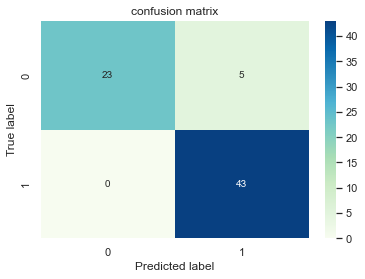

In [6]:
# 数据可视化
sns.set()
f,ax=plt.subplots()
C=confusion_matrix(y_test, y_pre, labels=[0, 1])
sns.heatmap(C,annot=True,ax=ax,cmap=plt.cm.GnBu) #热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('Predicted label') #x轴
ax.set_ylabel('True label') #y轴

## Logistic回归

In [7]:
from sklearn.linear_model import LogisticRegression

RMSE = []

for train_index, test_index in k_fold.split(x):
    train_x, test_x = x.iloc[train_index], x.iloc[test_index]
    train_y, test_y = y[train_index], y[test_index]
    
    LogisticModel = LogisticRegression()
    LogisticModel = LogisticModel.fit(train_x,train_y)
    y_pre = LogisticModel.predict(test_x)
    RMSE.append(sqrt(MSE(y_pre,test_y)))

print("RMSE:",sum(RMSE) / len(RMSE))

RMSE: 0.3456890214515769


In [8]:
# logistic预测
y_train = train_set['column_ai'].copy()
x_train = train_set.drop('column_ai', axis=1)
y_test = test_set['column_ai'].copy()
x_test = test_set.drop('column_ai', axis=1)

LogisticModel = LogisticRegression()
LogisticModel = LogisticModel.fit(x_train,y_train)
y_pre = LogisticModel.predict(x_test)
print(y_pre)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [9]:
# 计算指标
tp, fp, tn, fn = compute_confusion_matrix(y_pre, y_test)
accuracy, precision, recall, F1 = compute_indexes(tp, fp, tn, fn)
print("RMSE =",sqrt(MSE(y_pre,y_test)))
print("\nAccuracy =",accuracy, "\nPrecision =",precision, "\nRecall =",recall, "\nF1 =",F1)

RMSE = 0.37529331252040077

Accuracy = 0.8591549295774648 
Precision = 0.8113207547169812 
Recall = 1.0 
F1 = 0.8958333333333334


## 随机森林

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

RMSE = []

for train_index, test_index in k_fold.split(x):
    train_x, test_x = x.iloc[train_index], x.iloc[test_index]
    train_y, test_y = y[train_index], y[test_index]
    
    sgd_clf = sgd_clf.fit(train_x,train_y)
    y_pre = sgd_clf.predict(test_x)
    RMSE.append(sqrt(MSE(y_pre,test_y)))

print("RMSE:",sum(RMSE) / len(RMSE))

RMSE: 0.3883682501186126


In [11]:
# 随机森林
y_train = train_set['column_ai'].copy()
x_train = train_set.drop('column_ai', axis=1)
y_test = test_set['column_ai'].copy()
x_test = test_set.drop('column_ai', axis=1)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf = sgd_clf.fit(x_train,y_train)
y_pre = sgd_clf.predict(x_test)
print(y_pre)

[1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [12]:
# 计算指标
tp, fp, tn, fn = compute_confusion_matrix(y_pre, y_test)
accuracy, precision, recall, F1 = compute_indexes(tp, fp, tn, fn)
print("RMSE =",sqrt(MSE(y_pre,y_test)))
print("\nAccuracy =",accuracy, "\nPrecision =",precision, "\nRecall =",recall, "\nF1 =",F1)

RMSE = 0.37529331252040077

Accuracy = 0.8591549295774648 
Precision = 0.8113207547169812 
Recall = 1.0 
F1 = 0.8958333333333334


根据实验结果选择SVM分类模型对数据进行分类预测

## 训练SVM分类器

In [13]:
from sklearn.model_selection import cross_val_predict

svc_clf = SVC(random_state=42)
svc_clf.fit(x_train, y_train)
y_scores = cross_val_predict(svc_clf, x_train, y_train, cv=10, method="decision_function")

In [14]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

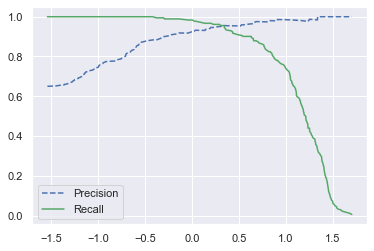

In [15]:
# 绘制精确率和召回率相对于阈值的函数图
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0, 0.5, 'precision')

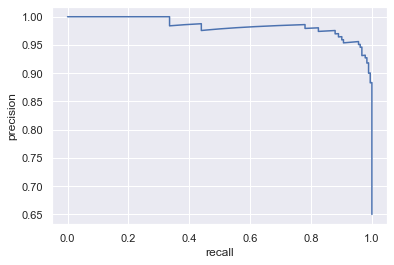

In [16]:
# 绘制精确率和召回率函数图
plt.plot(recalls, precisions)
plt.xlabel("recall")
plt.ylabel("precision")

In [17]:
# 精确度选择为95%
threshold_95_precision = thresholds[np.argmax(precisions >= 0.95)]
y_train_pred_95 = (y_scores >= threshold_95_precision)

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred_95)

0.9510869565217391

In [19]:
recall_score(y_train, y_train_pred_95)

0.9615384615384616

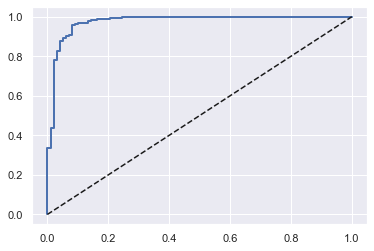

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plot_roc_curve(fpr, tpr)
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.9760596546310831

In [22]:
# 随机森林分类器
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train, cv=3, method="predict_proba")

In [23]:
y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

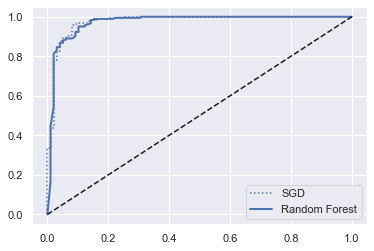

In [24]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

## 实验结论
SVM模型对于该数据集的分类具有较高的准确率，可以通过进一步聚类分析误差原因，优化预测模型

# 实验总结与体会
在解决回归预测问题或分类预测问题时，需要先对数据集进行数据处理，清洗异常数据和缺失数据。然后对数据进行可视化分析，选择较为适合的预测模型进行回归或分类。

当数据样本量较小时可以使用交叉验证优化模型，再通过调整相关参数或阈值选择较优模型。

对于一个机器学习模型，需要通过相关文档查阅各参数的使用方法和优化结构，调整模型参数。

对于预测得到的实验结果，可以通过对误差数据进行数据分析，优化初始模型结构。